In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sma

sns.set_context('talk')

np.random.seed(0)

# EJ 1

In [2]:
df = pd.read_csv('sample24.dat', header=None, names=['x'])
df.head()

,x
0,2.213701
1,2.871230
2,4.031105
3,4.288337
4,0.202051


In [3]:
mean = df['x'].mean()
std = df['x'].std()
var = std**2
print(mean, std, var)

skewness = df['x'].skew()
print(skewness)

3.0179812587666666 1.79158170844934 3.209765018050256
1.405753423851855


c:\Users\emanu\anaconda3\envs\famaf-mys\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='Count'>

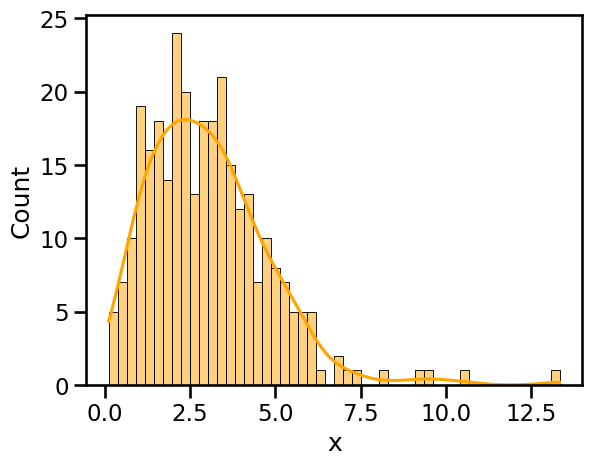

In [4]:
sns.histplot(df['x'], color='orange', kde=True, bins=50)

In [5]:
df['x'].quantile([0.25, 0.5, 0.75])

0.25    1.729471
0.50    2.836248
0.75    4.030335
Name: x, dtype: float64

<Axes: xlabel='x'>

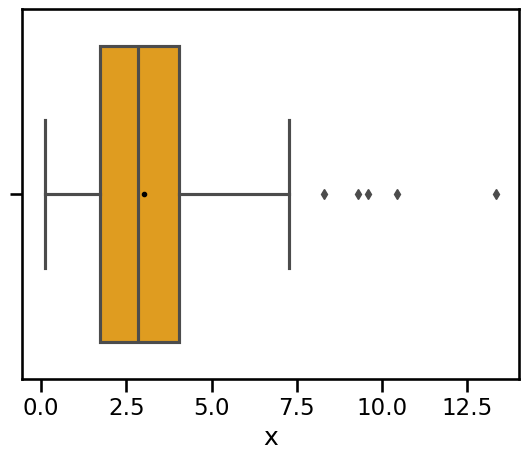

In [6]:
sns.boxplot(data=df, x='x', color='orange', fliersize = 5, \
        showmeans = True, meanprops = {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': 'black'})

# EJ 2

c:\Users\emanu\anaconda3\envs\famaf-mys\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\emanu\anaconda3\envs\famaf-mys\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\emanu\anaconda3\envs\famaf-mys\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


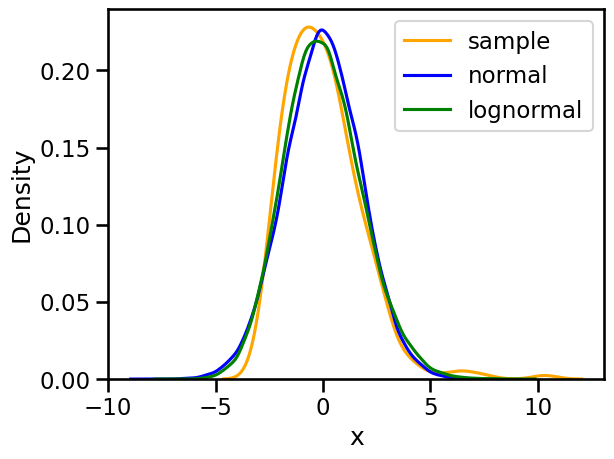

In [7]:
# Sample
sns.kdeplot(df['x'] - mean, color='orange')

# Normal
normal = np.random.normal(mean, std, 50_000)
normal = normal - normal.mean()
sns.kdeplot(normal, color='blue')

# Lognormal
lognormal = np.random.lognormal(3, 0.09, 50_000)
lognormal = lognormal - lognormal.mean()
sns.kdeplot(lognormal, color='green')

plt.legend(['sample', 'normal', 'lognormal', 'gamma'])

# EJ 3

## NORMAL

c:\Users\emanu\anaconda3\envs\famaf-mys\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\emanu\anaconda3\envs\famaf-mys\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


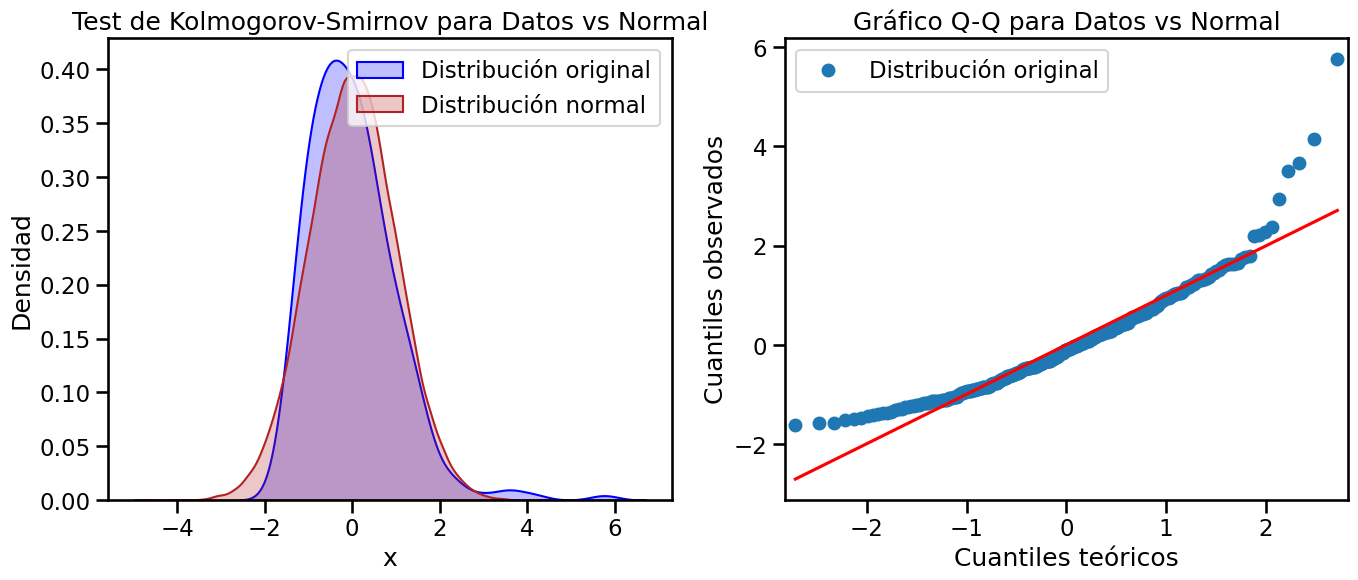

No rechazamos la hipótesis nula con un p-valor de 0.14107477240634625


False

In [8]:
# Verificación de normalidad de los datos con Kolmogorov-Smirnov
def graphical_normality_test(name, distribution, normal):
    """
    Grafica las dos distribuciones a comparar para el test de normalidad
    """
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

    # Gráfico de densidad
    sns.kdeplot(data = distribution, ax = ax[0], fill = True, color = 'blue', label = 'Distribución original')
    sns.kdeplot(data = normal, ax = ax[0], fill = True, color = 'firebrick', label = 'Distribución normal')

    ax[0].set_title(f'Test de Kolmogorov-Smirnov para {name}')
    ax[0].set_ylabel('Densidad')
    ax[0].legend()

    # Gráfico de Q-Q
    sma.qqplot(distribution, line ='s', ax = ax[1], label = 'Distribución original')

    ax[1].set_title(f'Gráfico Q-Q para {name}')
    ax[1].set_xlabel('Cuantiles teóricos')
    ax[1].set_ylabel('Cuantiles observados')
    ax[1].legend()

    plt.show()

# ¿Rechazamos la H0?
def hypothesis_test(p_value, alpha):
    """
    Función para evaluar si rechazamos la hipótesis nula
    """
    if p_value < alpha:
        print(f"Rechazamos la hipótesis nula con un p-valor de {p_value}")
        return True
    else:
        print(f"No rechazamos la hipótesis nula con un p-valor de {p_value}")
        return False

re_scaled_data = (df['x'] - mean) / std
comp = np.random.normal(size=100_000)
graphical_normality_test('Datos vs Normal', re_scaled_data, comp)
k_stat, p_value = st.kstest(re_scaled_data, 'norm')
hypothesis_test(p_value, 0.05)
